In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

In [30]:
dinkes_df = pd.read_csv("/content/Dinkes.csv")
print(dinkes_df.shape)
print(dinkes_df)

(17, 4)
                                     Jenis Data Satuan  2024  Keterangan
0                        Jumlah Penderita Diare  Orang  1931         NaN
1               Jumlah Penderita Demam Berdarah  Orang   164         NaN
2   Jumlah Penderita Infeksi Saluran Pernafasan  Orang  8209         NaN
3                       Jumlah Penderita Campak  Orang    11         NaN
4                      Jumlah Penderita Malaria  Orang     2         NaN
5                    Jumlah Penderita HIV/ AIDS  Orang    10         NaN
6                           Jumlah Penderita TB  Orang   405         NaN
7                 Jumlah Balita Kurus (Wasting)  Orang   229         NaN
8               Jumlah Balita Pendek (Stunting)  Orang   151         NaN
9                            Jumlah Dokter Umum  Orang   140         NaN
10                      Jumlah Dokter Spesialis  Orang   115         NaN
11                           Jumlah Dokter Gigi  Orang    19         NaN
12                                 Jumlah B

**Assessing Data**

In [31]:
# Menampilkan informasi pada dataset
dinkes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Jenis Data  17 non-null     object 
 1   Satuan      17 non-null     object 
 2   2024        17 non-null     int64  
 3   Keterangan  0 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 676.0+ bytes


In [32]:
# Memeriksa missing value
dinkes_df.isna().sum()

,0
Jenis Data,0
Satuan,0
2024,0
Keterangan,17


In [33]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", dinkes_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [34]:
# Menghapus kolom yang tidak diperlukan
dinkes_df = dinkes_df.drop(columns=["Keterangan"])
print(dinkes_df)

                                     Jenis Data Satuan  2024
0                        Jumlah Penderita Diare  Orang  1931
1               Jumlah Penderita Demam Berdarah  Orang   164
2   Jumlah Penderita Infeksi Saluran Pernafasan  Orang  8209
3                       Jumlah Penderita Campak  Orang    11
4                      Jumlah Penderita Malaria  Orang     2
5                    Jumlah Penderita HIV/ AIDS  Orang    10
6                           Jumlah Penderita TB  Orang   405
7                 Jumlah Balita Kurus (Wasting)  Orang   229
8               Jumlah Balita Pendek (Stunting)  Orang   151
9                            Jumlah Dokter Umum  Orang   140
10                      Jumlah Dokter Spesialis  Orang   115
11                           Jumlah Dokter Gigi  Orang    19
12                                 Jumlah Bidan  Orang   343
13                               Jumlah Perawat  Orang   575
14                              Jumlah Apoteker  Orang    38
15            Jumlah Sar

In [35]:
# Mengubah semua nama kolom menjadi string
dinkes_df.columns = dinkes_df.columns.map(str)
print(dinkes_df)

                                     Jenis Data Satuan  2024
0                        Jumlah Penderita Diare  Orang  1931
1               Jumlah Penderita Demam Berdarah  Orang   164
2   Jumlah Penderita Infeksi Saluran Pernafasan  Orang  8209
3                       Jumlah Penderita Campak  Orang    11
4                      Jumlah Penderita Malaria  Orang     2
5                    Jumlah Penderita HIV/ AIDS  Orang    10
6                           Jumlah Penderita TB  Orang   405
7                 Jumlah Balita Kurus (Wasting)  Orang   229
8               Jumlah Balita Pendek (Stunting)  Orang   151
9                            Jumlah Dokter Umum  Orang   140
10                      Jumlah Dokter Spesialis  Orang   115
11                           Jumlah Dokter Gigi  Orang    19
12                                 Jumlah Bidan  Orang   343
13                               Jumlah Perawat  Orang   575
14                              Jumlah Apoteker  Orang    38
15            Jumlah Sar

In [36]:
# Save data clean
dinkes_df.to_csv('dinkes_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [48]:
# Melihat Jumlah Penyakit Menular
# Filter baris yang mengandung kata 'Penderita' = penyakit menular
penyakit_menular = dinkes_df[dinkes_df['Jenis Data'].str.contains("Penderita", case=False)]

# Jumlahkan nilainya
total_penyakit_2024 = penyakit_menular['2024'].sum()

# Buat tabel jumlah per penyakit
penyakit_menular_rincian = penyakit_menular[['Jenis Data', '2024']].copy()
penyakit_menular_rincian.columns = ['Jenis Penyakit Menular', 'Tahun 2024']

# Tambahkan baris total ke dalam tabel
total_row = pd.DataFrame({
    'Jenis Penyakit Menular': ['Total Semua Penyakit Menular'],
    'Tahun 2024': [total_penyakit_2024]
})

# Gabungkan
penyakit_menular_rincian = pd.concat([penyakit_menular_rincian, total_row], ignore_index=True)

# Tampilkan
print(penyakit_menular_rincian)


                        Jenis Penyakit Menular  Tahun 2024
0                       Jumlah Penderita Diare        1931
1              Jumlah Penderita Demam Berdarah         164
2  Jumlah Penderita Infeksi Saluran Pernafasan        8209
3                      Jumlah Penderita Campak          11
4                     Jumlah Penderita Malaria           2
5                   Jumlah Penderita HIV/ AIDS          10
6                          Jumlah Penderita TB         405
7                 Total Semua Penyakit Menular       10732


In [52]:
# Melihat Jumlah Balita Wasting dan Stunting
# Filter baris yang mengandung kata 'Balita'
balita_df = dinkes_df[dinkes_df['Jenis Data'].str.contains("Balita", case=False)]

print("Jumlah Balita Wasting dan Stunting 2024:")
print(balita_df[['Jenis Data', '2024']])


Jumlah Balita Wasting dan Stunting 2024:
                        Jenis Data  2024
7    Jumlah Balita Kurus (Wasting)   229
8  Jumlah Balita Pendek (Stunting)   151


In [55]:
# Melihat Jumlah Tenaga Medis
# Filter baris yang mengandung kata 'Dokter'
tenagamedis_df = dinkes_df[dinkes_df['Jenis Data'].str.contains("Dokter", case=False)]

print("Jumlah Tenaga Medis Tahun 2024:")
print(tenagamedis_df[['Jenis Data', '2024']])


Jumlah Tenaga Medis Tahun 2024:
                 Jenis Data  2024
9        Jumlah Dokter Umum   140
10  Jumlah Dokter Spesialis   115
11       Jumlah Dokter Gigi    19


In [56]:
# Melihat Jumlah Tenaga Kesehatan
# Filter berdasarkan kata kunci yang berhubungan dengan tenaga kesehatan
nakes_keywords = ['Bidan', 'Perawat', 'Apoteker', 'Teknis Kefarmasian', 'Psikologis Klinis']
pattern = '|'.join(nakes_keywords)

# Filter data berdasarkan pola
nakes_df = dinkes_df[dinkes_df['Jenis Data'].str.contains(pattern, case=False)]

# Tampilkan hasil
print("Jumlah Tenaga Kesehatan Tahun 2024:")
print(nakes_df[['Jenis Data', '2024']])

total_nakes = nakes_df['2024'].sum()
print("\nTotal Semua Tenaga Kesehatan Tahun 2024:", total_nakes)

Jumlah Tenaga Kesehatan Tahun 2024:
                           Jenis Data  2024
12                       Jumlah Bidan   343
13                     Jumlah Perawat   575
14                    Jumlah Apoteker    38
15  Jumlah Sarjana Teknis Kefarmasian    69
16    Jumlah Tenaga Psikologis Klinis     1

Total Semua Tenaga Kesehatan Tahun 2024: 1026


# **Visualization & Explanatory Analysis**

<ipython-input-59-1063756125>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


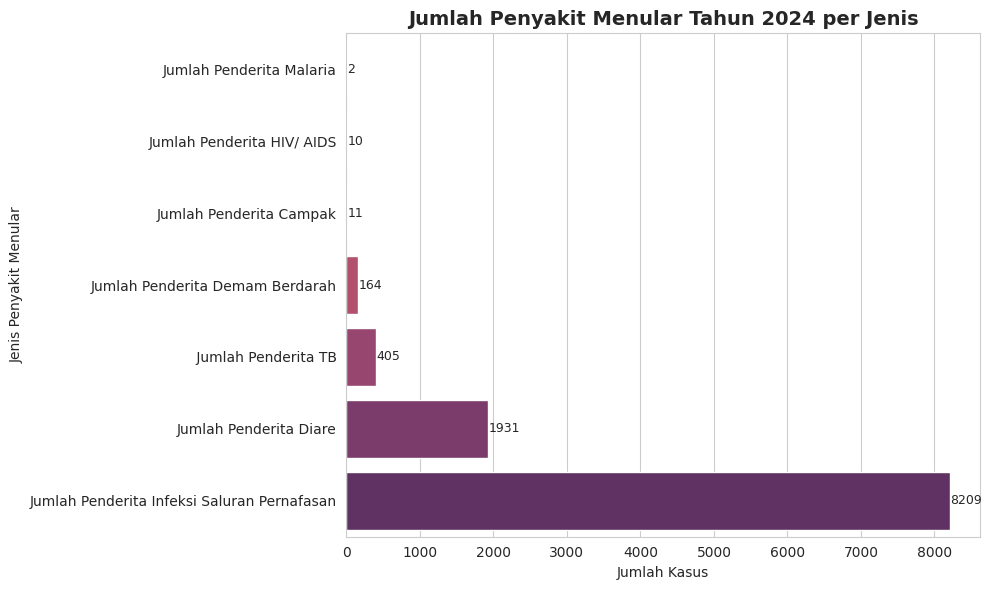

In [59]:
# Visualisasi Jumlah Penyakit Menular
# Filter data penyakit menular
penyakit_menular = dinkes_df[dinkes_df['Jenis Data'].str.contains("Penderita", case=False)].copy()
penyakit_menular = penyakit_menular[['Jenis Data', '2024']]
penyakit_menular.columns = ['Jenis Penyakit Menular', 'Jumlah Tahun 2024']

# Visualisasi horizontal bar chart
penyakit_menular = penyakit_menular.sort_values(by='Jumlah Tahun 2024', ascending=True)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(
    data=penyakit_menular,
    x='Jumlah Tahun 2024',
    y='Jenis Penyakit Menular',
    palette='flare'
)

# Tambahkan label nilai pada ujung bar
for index, value in enumerate(penyakit_menular['Jumlah Tahun 2024']):
    plt.text(value + 5, index, str(int(value)), va='center', fontsize=9)

# Tambahkan judul dan label
plt.title('Jumlah Penyakit Menular Tahun 2024 per Jenis', fontsize=14, weight='bold')
plt.xlabel('Jumlah Kasus')
plt.ylabel('Jenis Penyakit Menular')
plt.tight_layout()
plt.show()


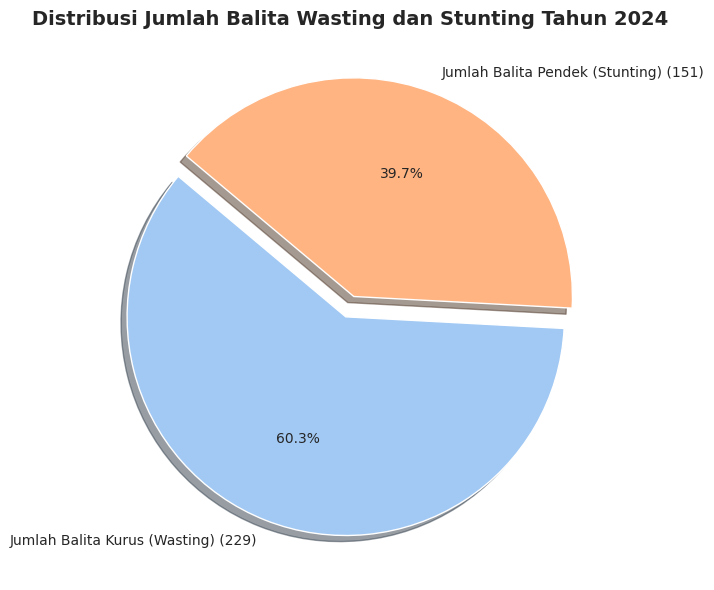

In [61]:
# Visualisasi Jumlah Balita Wasting dan Stunting
# Ambil data balita wasting dan stunting
wasting_stunting = dinkes_df[dinkes_df['Jenis Data'].str.contains("Wasting|Stunting", case=False)].copy()
wasting_stunting = wasting_stunting[['Jenis Data', '2024']]
wasting_stunting.columns = ['Kategori', 'Jumlah Tahun 2024']

# Pie chart kreatif dengan eksplodasi slice
colors = sns.color_palette("pastel")[0:2]
explode = [0.05] * len(wasting_stunting)

# Tambahkan angka jumlah ke dalam label
labels_with_values = [
    f"{row['Kategori']} ({int(row['Jumlah Tahun 2024'])})"
    for _, row in wasting_stunting.iterrows()
]

plt.figure(figsize=(8, 6))
plt.pie(
    wasting_stunting['Jumlah Tahun 2024'],
    labels=labels_with_values,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    colors=colors,
    shadow=True
)

plt.title('Distribusi Jumlah Balita Wasting dan Stunting Tahun 2024', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


<ipython-input-64-1350581356>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


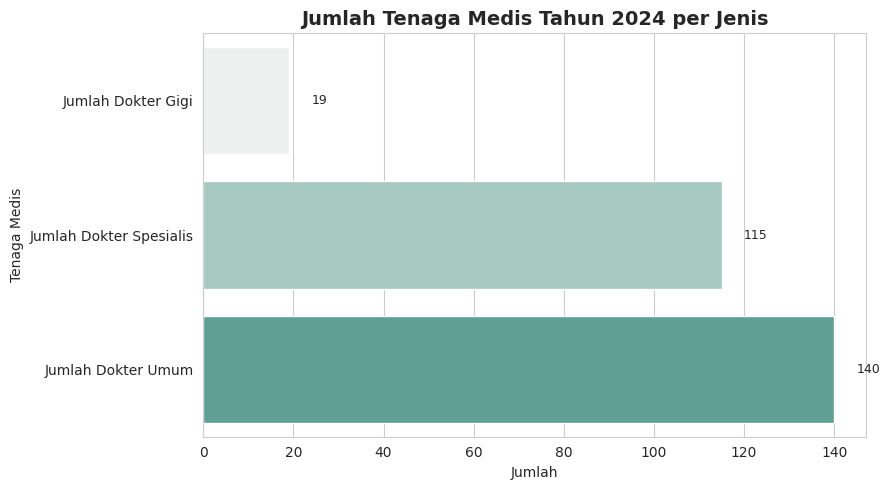

In [64]:
# Visualisasi Jumlah Tenaga Medis Tahun 2024
# Filter tenaga medis, misalnya: Dokter Umum, Dokter Gigi, Dokter Spesialis
tenaga_medis_keywords = ['Dokter Umum', 'Dokter Gigi', 'Dokter Spesialis']
pattern_medis = '|'.join(tenaga_medis_keywords)

tenaga_medis_df = dinkes_df[dinkes_df['Jenis Data'].str.contains(pattern_medis, case=False)].copy()
tenaga_medis_df = tenaga_medis_df[['Jenis Data', '2024']]
tenaga_medis_df.columns = ['Jenis Tenaga Medis', 'Jumlah Tahun 2024']
tenaga_medis_df = tenaga_medis_df.sort_values(by='Jumlah Tahun 2024', ascending=True)

# Membuat horizontal bar chart kreatif
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
sns.barplot(
    data=tenaga_medis_df,
    x='Jumlah Tahun 2024',
    y='Jenis Tenaga Medis',
    palette='light:#5A9'
)

# Tambahkan angka pada ujung bar
for index, value in enumerate(tenaga_medis_df['Jumlah Tahun 2024']):
    plt.text(value + 5, index, str(int(value)), va='center', fontsize=9)

# Judul dan label
plt.title('Jumlah Tenaga Medis Tahun 2024 per Jenis', fontsize=14, weight='bold')
plt.xlabel('Jumlah')
plt.ylabel('Tenaga Medis')
plt.tight_layout()
plt.show()


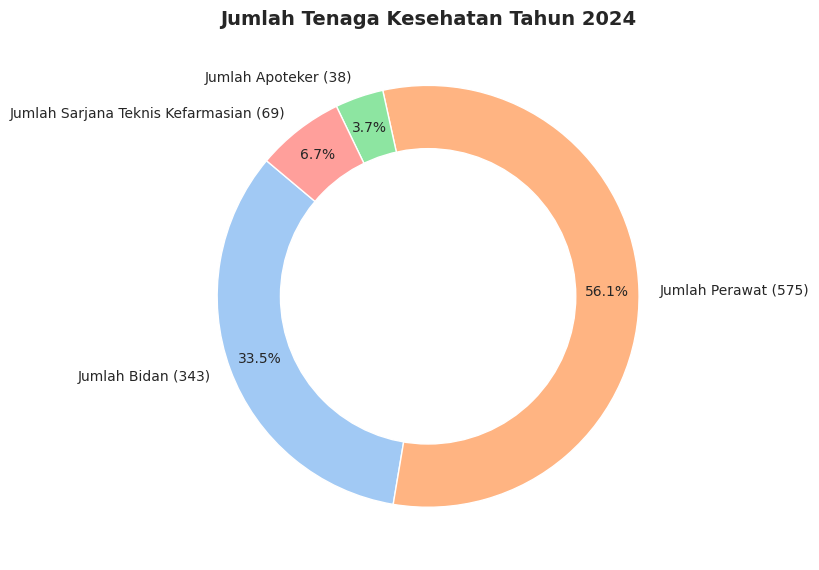

In [68]:
# Visualisasi Jumlah Tenaga Kesehatan Tahun 2024
# Filter data untuk tenaga kesehatan
nakes_keywords = ['Bidan', 'Perawat', 'Apoteker', 'Teknis Kefarmasian', 'Psikolog Klinis']
pattern_nakes = '|'.join(nakes_keywords)

nakes_df = dinkes_df[dinkes_df['Jenis Data'].str.contains(pattern_nakes, case=False)].copy()
nakes_df = nakes_df[['Jenis Data', '2024']]
nakes_df.columns = ['Jenis Tenaga Kesehatan', 'Jumlah Tahun 2024']

# Label kategori + angka
labels = [
    f"{row['Jenis Tenaga Kesehatan']} ({int(row['Jumlah Tahun 2024'])})"
    for _, row in nakes_df.iterrows()
]

# Warna
colors = sns.color_palette("pastel")[:len(nakes_df)]

# Buat donut chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    nakes_df['Jumlah Tahun 2024'],
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),  # ini membuat 'donut'
    pctdistance=0.85
)

# Tengah lingkaran diberi warna putih agar membentuk donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Judul dan layout
plt.title('Jumlah Tenaga Kesehatan Tahun 2024', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()